In [1]:
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv("../Dataset.csv")
data = data.drop('Name', axis = 1)

x = data.drop('Emotion', axis = 1)
y = data['Emotion']

scaler = MinMaxScaler(feature_range = (0, 1))
xRescaled = scaler.fit_transform(x)
x = pd.DataFrame(data = xRescaled, columns = x.columns)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

dataTrain, dataTest, classTrain, classTest = train_test_split(x, y, test_size = 0.2, random_state = 123)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(dataTrain, classTrain)

train_pred = knn.predict(dataTrain)
test_pred = knn.predict(dataTest)


Confusion Matrix and Classification Report for Training Set:


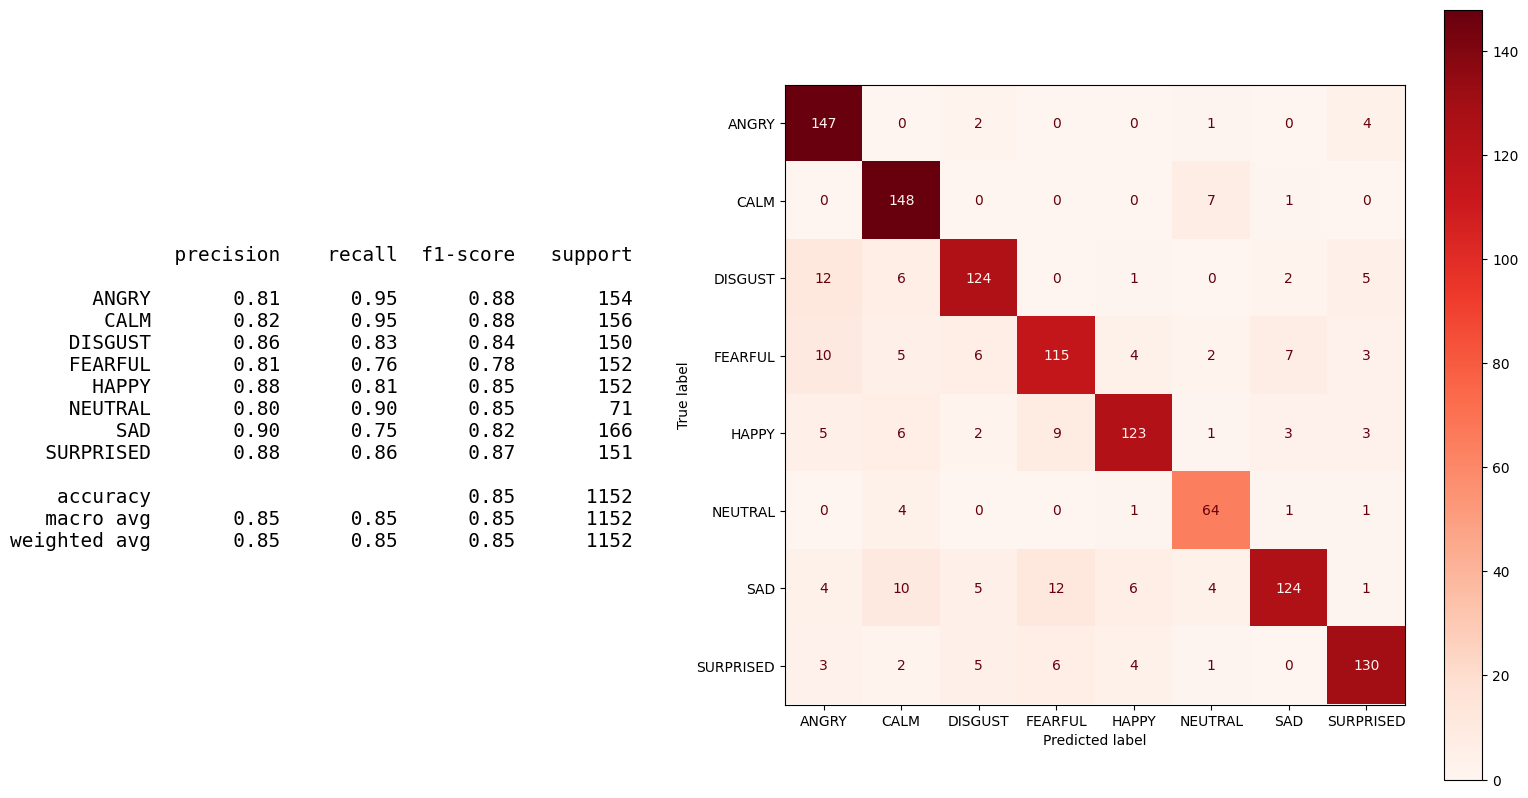

In [3]:
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

print("Confusion Matrix and Classification Report for Training Set:")

#Displaying the classification report AND the confusion matrix display
disp = ConfusionMatrixDisplay.from_predictions(classTrain, train_pred, display_labels = knn.classes_, cmap = plt.cm.Reds)
fig = disp.figure_
fig.set_figwidth(10)
fig.set_figheight(10)
mono = {'family' : 'monospace'}
cr = classification_report(classTrain, train_pred, zero_division = 0, target_names = knn.classes_)
plt.text(-10.5, 5.75, cr, fontdict = mono, fontsize = 14)
plt.show()

Confusion Matrix and Classification Report for Test Set:


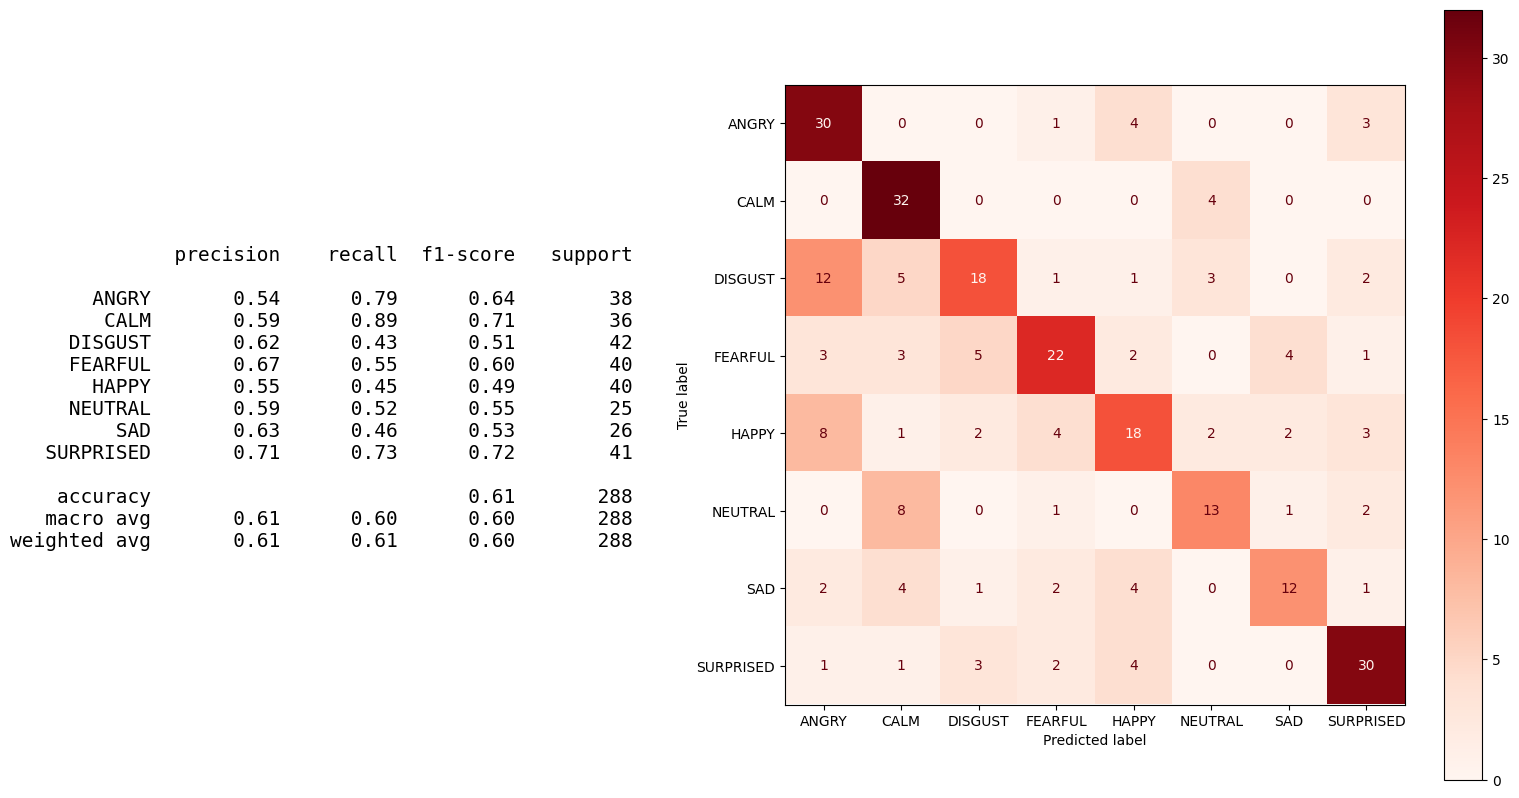

In [4]:
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

print("Confusion Matrix and Classification Report for Test Set:")

#Displaying the confusion matrix display and the classification report for the test set
disp = ConfusionMatrixDisplay.from_predictions(classTest, test_pred, display_labels = knn.classes_, cmap = plt.cm.Reds)
fig = disp.figure_
fig.set_figwidth(10)
fig.set_figheight(10)
mono = {'family' : 'monospace'}
cr = classification_report(classTest, test_pred, zero_division = 0, target_names = knn.classes_)
plt.text(-10.5, 5.75, cr, fontdict = mono, fontsize = 14)
plt.show()


In [5]:
from sklearn.pipeline import Pipeline
from joblib import dump

model = Pipeline([('scaler', scaler), ('knn', knn)])
dump(model, "../Raw Models/KNN.joblib")

['../Raw Models/KNN.joblib']